# INSTALLING DEPENDIES

In [4]:
!pip install tensorflow
!pip install opencv-python mediapipe scikit-learn

# KEYPOINTS USING MP HOLISISTIC

In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [113]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [21]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [114]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [115]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [116]:
results

mediapipe.python.solution_base.SolutionOutputs

In [120]:
draw_landmarks(frame, results)

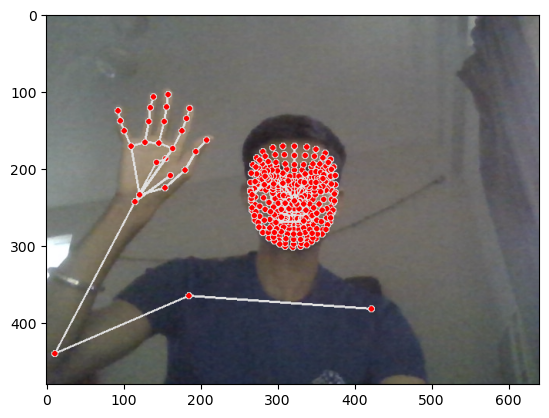

In [119]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# EXTRACT KEYPOINTS~

In [123]:
len(results.right_hand_landmarks.landmark)

21

In [124]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [125]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if (results.face_landmarks) else np.zeros(1404)

In [126]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [127]:
468*3+33*4+21*3+21*3

1662

In [128]:
result_test= extract_keypoints(results)

In [129]:
result_test

array([ 0.50353098,  0.50473684, -0.86366528, ...,  0.14638625,
        0.26089558, -0.03301686])

In [130]:
np.save('0', result_test)

In [131]:
np.load('0.npy')

array([ 0.50353098,  0.50473684, -0.86366528, ...,  0.14638625,
        0.26089558, -0.03301686])

# SETUP FOR DATA FOLDER FOR COLLECTION

In [132]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [133]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect keypoints for testing and training

In [134]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# PREPROCESSING DATA AND CREATE LABELS AND FEATURES

In [135]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [136]:
label_map = {label:num for num, label in enumerate(actions)}

In [137]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [138]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [139]:
np.array(sequences).shape

(90, 30, 1662)

In [140]:
np.array(labels).shape

(90,)

In [141]:
X = np.array(sequences)

In [142]:
X.shape

(90, 30, 1662)

In [143]:
y = to_categorical(labels).astype(int)

In [144]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [146]:
y_test.shape

(5, 3)

# BUILD AND TRAIN LSTM NEURAL NETWORK

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [148]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [149]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [150]:
res = [.7, 0.2, 0.1]

In [151]:
actions[np.argmax(res)]

'hello'

In [152]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [153]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 10s 70ms/step - loss: 1.2690 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.2563 - categorical_accuracy: 0.3176
Epoch 3/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0909 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1046 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1024 - categorical_accuracy: 0.3176
Epoch 6/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1320 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0917 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0950 - categorical_accuracy: 0.4706
Epoch 9/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0928 - categorical_accuracy: 0.3882


3/3 [==============================] - 0s 76ms/step - loss: 1.8215 - categorical_accuracy: 0.3059
Epoch 75/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.6190 - categorical_accuracy: 0.3412
Epoch 76/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.1212 - categorical_accuracy: 0.4000
Epoch 77/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0036 - categorical_accuracy: 0.3647
Epoch 78/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.8946 - categorical_accuracy: 0.6353
Epoch 79/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.8741 - categorical_accuracy: 0.4824
Epoch 80/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.4246 - categorical_accuracy: 0.3412
Epoch 81/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.9212 - categorical_accuracy: 0.4471
Epoch 82/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.8354 - categorical_accuracy: 0.6353
Epoch 

3/3 [==============================] - 0s 70ms/step - loss: 1.0828 - categorical_accuracy: 0.3765
Epoch 147/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0834 - categorical_accuracy: 0.3294
Epoch 148/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0786 - categorical_accuracy: 0.3412
Epoch 149/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0931 - categorical_accuracy: 0.3529
Epoch 150/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1911 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0959 - categorical_accuracy: 0.3529
Epoch 152/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0955 - categorical_accuracy: 0.3529
Epoch 153/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0914 - categorical_accuracy: 0.3529
Epoch 154/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0881 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 71ms/step - loss: 1.0374 - categorical_accuracy: 0.4353
Epoch 219/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0477 - categorical_accuracy: 0.3529
Epoch 220/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0288 - categorical_accuracy: 0.3765
Epoch 221/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0290 - categorical_accuracy: 0.4471
Epoch 222/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0134 - categorical_accuracy: 0.5059
Epoch 223/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0161 - categorical_accuracy: 0.4118
Epoch 224/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0043 - categorical_accuracy: 0.4824
Epoch 225/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9939 - categorical_accuracy: 0.5176
Epoch 226/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9810 - categorical_accuracy: 0.482

3/3 [==============================] - 0s 72ms/step - loss: 0.7395 - categorical_accuracy: 0.5765
Epoch 291/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7294 - categorical_accuracy: 0.6353
Epoch 292/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.7356 - categorical_accuracy: 0.6000
Epoch 293/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7356 - categorical_accuracy: 0.6118
Epoch 294/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7111 - categorical_accuracy: 0.6353
Epoch 295/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7055 - categorical_accuracy: 0.6353
Epoch 296/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6786 - categorical_accuracy: 0.6471
Epoch 297/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.6794 - categorical_accuracy: 0.6471
Epoch 298/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.6845 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 70ms/step - loss: 0.5134 - categorical_accuracy: 0.7882
Epoch 363/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.5197 - categorical_accuracy: 0.7176
Epoch 364/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5049 - categorical_accuracy: 0.7529
Epoch 365/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4969 - categorical_accuracy: 0.7412
Epoch 366/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4904 - categorical_accuracy: 0.7647
Epoch 367/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4871 - categorical_accuracy: 0.7765
Epoch 368/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4857 - categorical_accuracy: 0.7765
Epoch 369/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5092 - categorical_accuracy: 0.7412
Epoch 370/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4760 - categorical_accuracy: 0.776

3/3 [==============================] - 0s 69ms/step - loss: 0.4141 - categorical_accuracy: 0.7647
Epoch 435/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3915 - categorical_accuracy: 0.8000
Epoch 436/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4087 - categorical_accuracy: 0.8118
Epoch 437/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4114 - categorical_accuracy: 0.8000
Epoch 438/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4048 - categorical_accuracy: 0.7765
Epoch 439/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4136 - categorical_accuracy: 0.8235
Epoch 440/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4174 - categorical_accuracy: 0.7765
Epoch 441/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4830 - categorical_accuracy: 0.8000
Epoch 442/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4310 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 69ms/step - loss: 0.4386 - categorical_accuracy: 0.7765
Epoch 507/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4478 - categorical_accuracy: 0.7765
Epoch 508/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4830 - categorical_accuracy: 0.8118
Epoch 509/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4322 - categorical_accuracy: 0.8118
Epoch 510/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.3617 - categorical_accuracy: 0.8471
Epoch 511/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4079 - categorical_accuracy: 0.8353
Epoch 512/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3775 - categorical_accuracy: 0.8235
Epoch 513/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.3833 - categorical_accuracy: 0.8471
Epoch 514/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.3273 - categorical_accuracy: 0.858

3/3 [==============================] - 0s 71ms/step - loss: 0.4293 - categorical_accuracy: 0.8706
Epoch 579/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4364 - categorical_accuracy: 0.8588
Epoch 580/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4232 - categorical_accuracy: 0.8588
Epoch 581/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4427 - categorical_accuracy: 0.8706
Epoch 582/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4437 - categorical_accuracy: 0.8353
Epoch 583/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4544 - categorical_accuracy: 0.8118
Epoch 584/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3908 - categorical_accuracy: 0.8824
Epoch 585/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4474 - categorical_accuracy: 0.8471
Epoch 586/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4024 - categorical_accuracy: 0.870

3/3 [==============================] - 0s 71ms/step - loss: 0.3132 - categorical_accuracy: 0.8706
Epoch 651/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2913 - categorical_accuracy: 0.9059
Epoch 652/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2866 - categorical_accuracy: 0.9059
Epoch 653/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2894 - categorical_accuracy: 0.8824
Epoch 654/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2737 - categorical_accuracy: 0.9059
Epoch 655/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2706 - categorical_accuracy: 0.8941
Epoch 656/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2584 - categorical_accuracy: 0.9059
Epoch 657/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2507 - categorical_accuracy: 0.9176
Epoch 658/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2507 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 74ms/step - loss: 0.1832 - categorical_accuracy: 0.9176
Epoch 723/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1797 - categorical_accuracy: 0.9176
Epoch 724/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1615 - categorical_accuracy: 0.9412
Epoch 725/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1415 - categorical_accuracy: 0.9412
Epoch 726/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1547 - categorical_accuracy: 0.9412
Epoch 727/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1425 - categorical_accuracy: 0.9529
Epoch 728/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1367 - categorical_accuracy: 0.9412
Epoch 729/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1717 - categorical_accuracy: 0.9294
Epoch 730/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2423 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 71ms/step - loss: 0.1929 - categorical_accuracy: 0.9294
Epoch 795/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2333 - categorical_accuracy: 0.9059
Epoch 796/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0919 - categorical_accuracy: 0.9647
Epoch 797/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1109 - categorical_accuracy: 0.9647
Epoch 798/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1114 - categorical_accuracy: 0.9529
Epoch 799/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1290 - categorical_accuracy: 0.9529
Epoch 800/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0914 - categorical_accuracy: 0.9765
Epoch 801/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0977 - categorical_accuracy: 0.9647
Epoch 802/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1053 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 70ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0065 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0052 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0049 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0067 - categorical_accuracy: 1.0000
Epoch 871/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 872/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0076 - categorical_accuracy: 1.0000
Epoch 873/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 874/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0023 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 75ms/step - loss: 2.9382e-05 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.8603e-05 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.7805e-05 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.7114e-05 - categorical_accuracy: 1.0000
Epoch 940/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.6449e-05 - categorical_accuracy: 1.0000
Epoch 941/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.5700e-05 - categorical_accuracy: 1.0000
Epoch 942/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.5168e-05 - categorical_accuracy: 1.0000
Epoch 943/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.4456e-05 - categorical_accuracy: 1.0000
Epoch 944/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.39

3/3 [==============================] - 0s 71ms/step - loss: 9.9183e-06 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 71ms/step - loss: 9.8145e-06 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 71ms/step - loss: 9.7010e-06 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 71ms/step - loss: 9.6659e-06 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 69ms/step - loss: 9.5622e-06 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 77ms/step - loss: 9.4612e-06 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 70ms/step - loss: 9.3519e-06 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 70ms/step - loss: 9.2776e-06 - categorical_accuracy: 1.0000
Epoch 1014/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 5.6229e-06 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.6033e-06 - categorical_accuracy: 1.0000
Epoch 1077/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.5556e-06 - categorical_accuracy: 1.0000
Epoch 1078/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.5108e-06 - categorical_accuracy: 1.0000
Epoch 1079/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.5010e-06 - categorical_accuracy: 1.0000
Epoch 1080/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.4505e-06 - categorical_accuracy: 1.0000
Epoch 1081/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.4070e-06 - categorical_accuracy: 1.0000
Epoch 1082/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.3706e-06 - categorical_accuracy: 1.0000
Epoch 1083/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 3.7021e-06 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 77ms/step - loss: 3.6867e-06 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.6642e-06 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.6376e-06 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.6250e-06 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.5969e-06 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.5969e-06 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.5675e-06 - categorical_accuracy: 1.0000
Epoch 1152/2000
3/3 [==============================] - 0s 67ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 2.5943e-06 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.5803e-06 - categorical_accuracy: 1.0000
Epoch 1215/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.5789e-06 - categorical_accuracy: 1.0000
Epoch 1216/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.5551e-06 - categorical_accuracy: 1.0000
Epoch 1217/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.5439e-06 - categorical_accuracy: 1.0000
Epoch 1218/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.5369e-06 - categorical_accuracy: 1.0000
Epoch 1219/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.5270e-06 - categorical_accuracy: 1.0000
Epoch 1220/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.5102e-06 - categorical_accuracy: 1.0000
Epoch 1221/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 1.9255e-06 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.9185e-06 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.9086e-06 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.9044e-06 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.8960e-06 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.8932e-06 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.8806e-06 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.8750e-06 - categorical_accuracy: 1.0000
Epoch 1290/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 1.5006e-06 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.4964e-06 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.4921e-06 - categorical_accuracy: 1.0000
Epoch 1354/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.4879e-06 - categorical_accuracy: 1.0000
Epoch 1355/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.4851e-06 - categorical_accuracy: 1.0000
Epoch 1356/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.4809e-06 - categorical_accuracy: 1.0000
Epoch 1357/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.4767e-06 - categorical_accuracy: 1.0000
Epoch 1358/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.4711e-06 - categorical_accuracy: 1.0000
Epoch 1359/2000
3/3 [==============================] - 0s 116ms/step - l

3/3 [==============================] - 0s 74ms/step - loss: 1.2285e-06 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.2243e-06 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2215e-06 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2159e-06 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.2131e-06 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2103e-06 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2061e-06 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.2033e-06 - categorical_accuracy: 1.0000
Epoch 1428/2000
3/3 [==============================] - 0s 71ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 1.0252e-06 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0224e-06 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0196e-06 - categorical_accuracy: 1.0000
Epoch 1492/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0182e-06 - categorical_accuracy: 1.0000
Epoch 1493/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0125e-06 - categorical_accuracy: 1.0000
Epoch 1494/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0111e-06 - categorical_accuracy: 1.0000
Epoch 1495/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0083e-06 - categorical_accuracy: 1.0000
Epoch 1496/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0069e-06 - categorical_accuracy: 1.0000
Epoch 1497/2000
3/3 [==============================] - 0s 79ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 8.6529e-07 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.6389e-07 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.6109e-07 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.6109e-07 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.5828e-07 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 79ms/step - loss: 8.5688e-07 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.5408e-07 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.5127e-07 - categorical_accuracy: 1.0000
Epoch 1566/2000
3/3 [==============================] - 0s 75ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 7.3347e-07 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.3207e-07 - categorical_accuracy: 1.0000
Epoch 1629/2000
3/3 [==============================] - 0s 71ms/step - loss: 7.2926e-07 - categorical_accuracy: 1.0000
Epoch 1630/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.2786e-07 - categorical_accuracy: 1.0000
Epoch 1631/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.2506e-07 - categorical_accuracy: 1.0000
Epoch 1632/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.2506e-07 - categorical_accuracy: 1.0000
Epoch 1633/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.2225e-07 - categorical_accuracy: 1.0000
Epoch 1634/2000
3/3 [==============================] - 0s 72ms/step - loss: 7.2085e-07 - categorical_accuracy: 1.0000
Epoch 1635/2000
3/3 [==============================] - 0s 71ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 6.2128e-07 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.1988e-07 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.1847e-07 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.1707e-07 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.1567e-07 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 77ms/step - loss: 6.1286e-07 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 72ms/step - loss: 6.1286e-07 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.1146e-07 - categorical_accuracy: 1.0000
Epoch 1704/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 5.0768e-07 - categorical_accuracy: 1.0000
Epoch 1766/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.0488e-07 - categorical_accuracy: 1.0000
Epoch 1767/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.0348e-07 - categorical_accuracy: 1.0000
Epoch 1768/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.0207e-07 - categorical_accuracy: 1.0000
Epoch 1769/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.0067e-07 - categorical_accuracy: 1.0000
Epoch 1770/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.9646e-07 - categorical_accuracy: 1.0000
Epoch 1771/2000
3/3 [==============================] - 0s 69ms/step - loss: 4.9366e-07 - categorical_accuracy: 1.0000
Epoch 1772/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.9226e-07 - categorical_accuracy: 1.0000
Epoch 1773/2000
3/3 [==============================] - 0s 69ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 2.2860e-07 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.2579e-07 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.2159e-07 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.1738e-07 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.1598e-07 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.1177e-07 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.1037e-07 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.0756e-07 - categorical_accuracy: 1.0000
Epoch 1842/2000
3/3 [==============================] - 0s 69ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1904/2000
3/3 [==============================] - 0s 69ms/step - loss: 9.9574e-08 - categorical_accuracy: 1.0000
Epoch 1905/2000
3/3 [==============================] - 0s 74ms/step - loss: 9.8172e-08 - categorical_accuracy: 1.0000
Epoch 1906/2000
3/3 [==============================] - 0s 72ms/step - loss: 9.6770e-08 - categorical_accuracy: 1.0000
Epoch 1907/2000
3/3 [==============================] - 0s 74ms/step - loss: 9.5367e-08 - categorical_accuracy: 1.0000
Epoch 1908/2000
3/3 [==============================] - 0s 70ms/step - loss: 9.3965e-08 - categorical_accuracy: 1.0000
Epoch 1909/2000
3/3 [==============================] - 0s 71ms/step - loss: 9.3965e-08 - categorical_accuracy: 1.0000
Epoch 1910/2000
3/3 [==============================] - 0s 71ms/step - loss: 9.2562e-08 - categorical_accuracy: 1.0000
Epoch 1911/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 75ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 1980/2000
3/3 [==============================] - 0s 75ms/step - lo

In [169]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# MAKE PREDICTIONS

In [170]:
res = model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


In [171]:
actions[np.argmax(res[4])]

'hello'

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [172]:
actions[np.argmax(y_test[4])]

'hello'

# SAVE WEIGHTS

In [173]:
model.save('action.h5')

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
del model

In [174]:
model.load_weights('action.h5')

# EVALUATION USING CONFUSION MATRIX AND ACCURACY

In [175]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [176]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [177]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [178]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [179]:
accuracy_score(ytrue, yhat)

1.0

# TEST IN REAL TIME

In [180]:
from scipy import stats

In [186]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

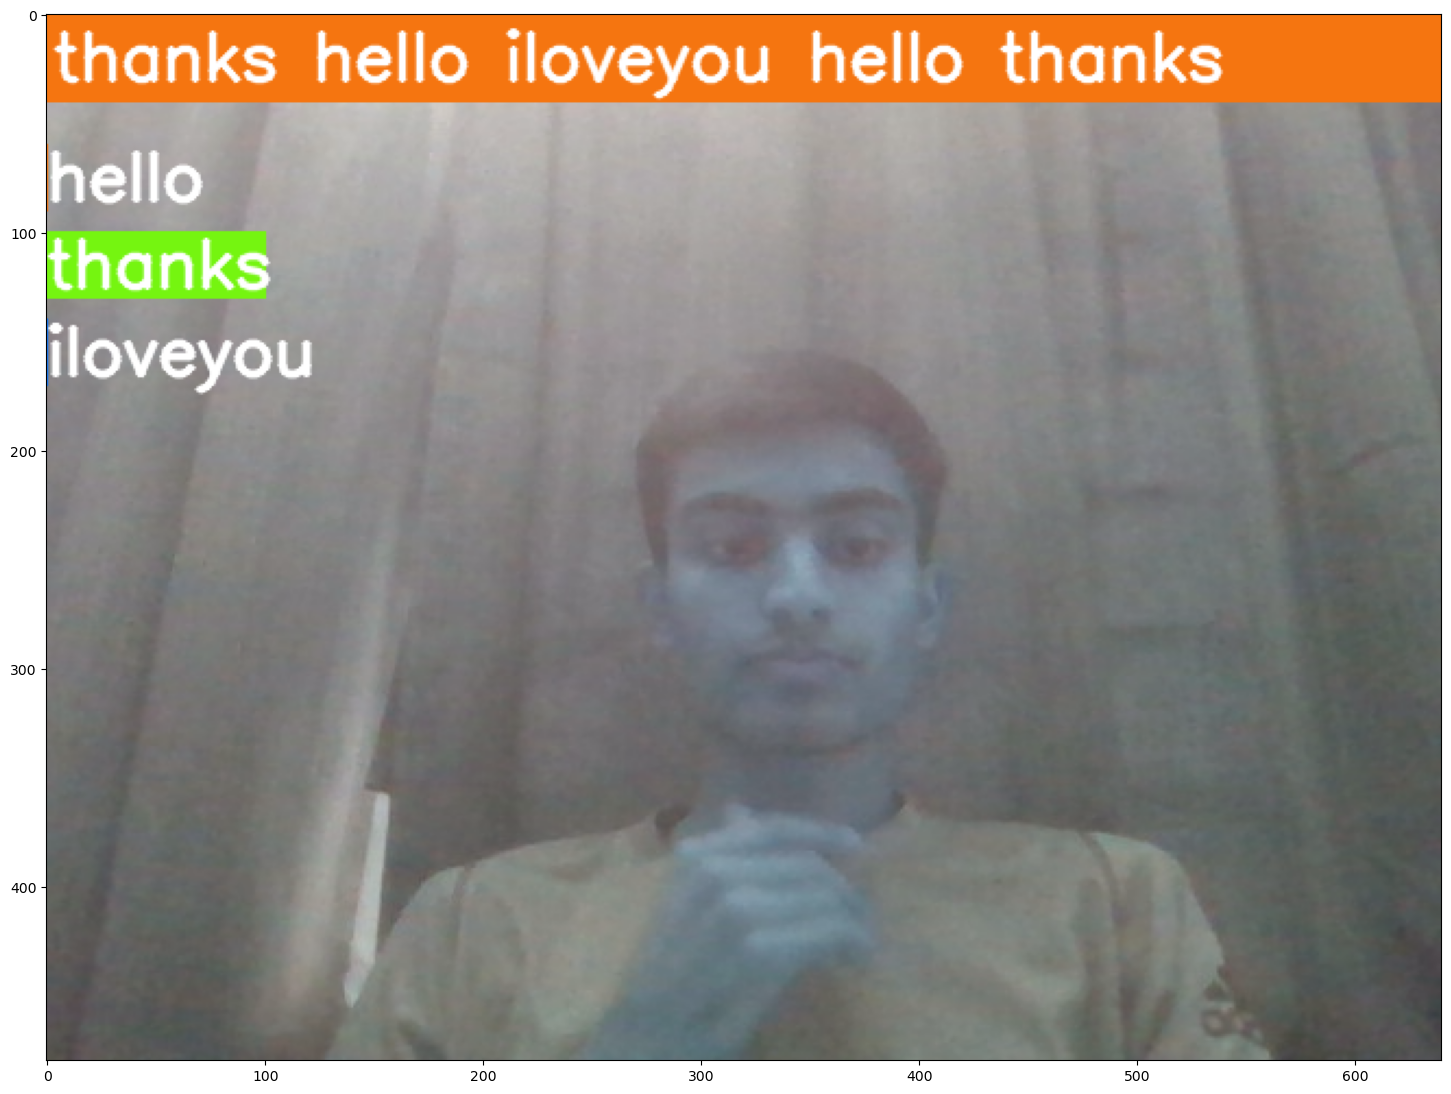

In [187]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [185]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'media

1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<cla

1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.pyth